In [1]:
%matplotlib notebook

In [2]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
def liklihood_distribution(x,mu,sigma):
    m = mu.shape[0]
    x = x-mu.T    
    pdf = 1/((2*np.pi)**(m/2)*np.linalg.det(sigma)**(0.5))*np.exp(-0.5*np.sum(x.dot(np.linalg.pinv(sigma))*x,axis=1))        
    return pdf

def prior_probability(classSize,totalSize):
    return classSize/totalSize

def posterior_probability(x,prior,mu,sigma):
    pdf =liklihood_distribution(x,mu,sigma) * prior
    return pdf

def liklihoodClassifier(X,Y,mu_Xy0,sigma_Xy0,mu_Xy1,sigma_Xy1):
    cnt=0
    for i in range(len(X)):
        x, y = X[i], Y[i]
        prob_y0 = liklihood_distribution([x], mu_Xy0,sigma_Xy0)
        prob_y1 = liklihood_distribution([x], mu_Xy1,sigma_Xy1)
        if(prob_y1>prob_y0):
            if(y==1):
                cnt+=1
        else:
            if(y==0):
                cnt+=1
    
    print("\n-----Likelihood predictions-----")
    print("# Correct predictions:" + str(cnt))
    print("Total data size: " + str(len(X)))       
    print("Accuracy: " + str(cnt/len(X)))

    
def posteriorClassifier(X,Y,prior_Xy0,prior_Xy1,mu_Xy0,sigma_Xy0,mu_Xy1,sigma_Xy1):
    cnt=0
    for i in range(len(X)):
        x, y = X[i], Y[i]
        prob_y0 = posterior_probability([x],prior_Xy0, mu_Xy0,sigma_Xy0)
        prob_y1 = posterior_probability([x],prior_Xy1, mu_Xy1,sigma_Xy1)
        if(prob_y1>prob_y0):
            if(y==1):
                cnt+=1
        else:
            if(y==0):
                cnt+=1
    
    print("\n-----Posterior predictions-----")
    print("# Correct predictions:" + str(cnt))
    print("Total data size: " + str(len(X)))       
    print("Accuracy: " + str(cnt/len(X)))

## Class with equal prior but distinct (no overlap of PDF)

<IPython.core.display.Javascript object>


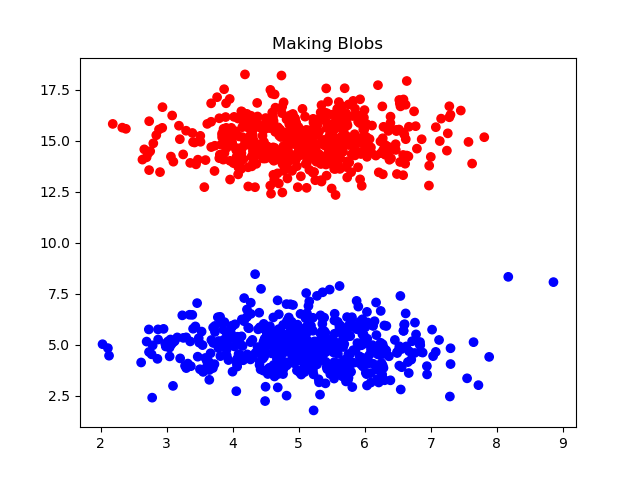

(346, 2) (354, 2)


<IPython.core.display.Javascript object>


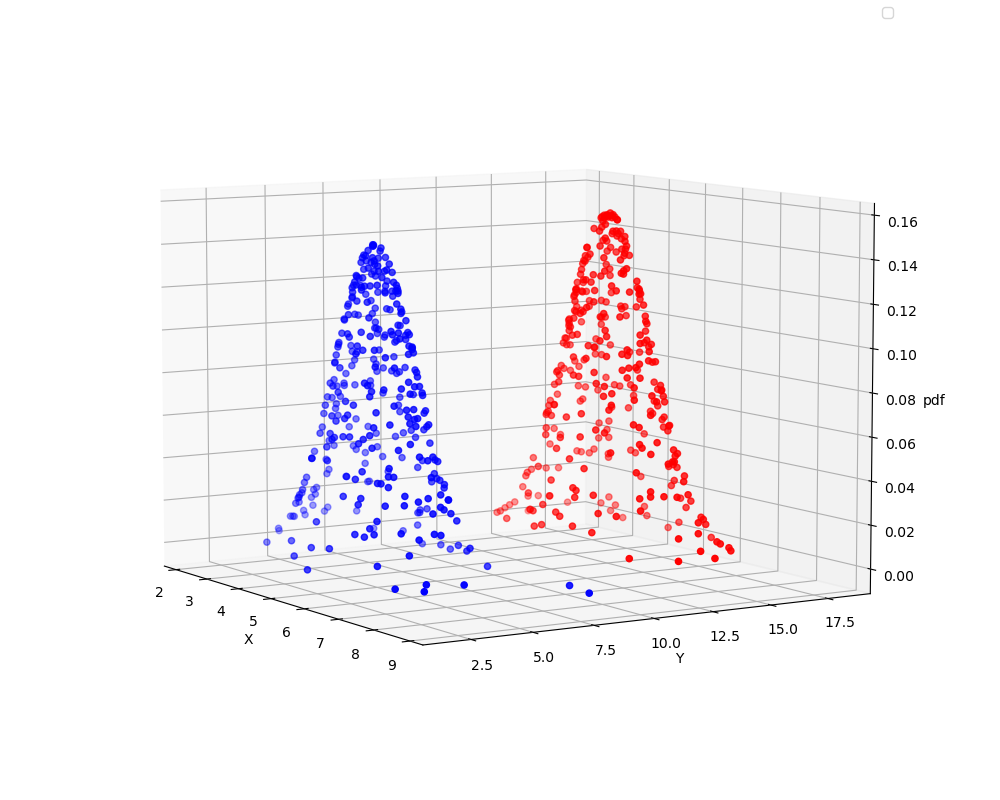

No handles with labels found to put in legend.


Prior probability for y=0: 0.4942857142857143
Prior probability for y=1: 0.5057142857142857

-----Likelihood predictions-----
# Correct predictions:300
Total data size: 300
Accuracy: 1.0

-----Posterior predictions-----
# Correct predictions:300
Total data size: 300
Accuracy: 1.0


In [4]:
n_samples = [500, 500]
centers = np.array([[5, 5], [5, 15]])

X, y = make_blobs(n_samples=n_samples,centers=centers, cluster_std=1, random_state=100)
cols = ['b','r','g','m','c']
col= [cols[int(i)] for i in y]
plt.figure()
plt.scatter(X[:, 0], X[:, 1], color=col)
plt.title('Making Blobs')
plt.show()

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109) # 70% training and 30% test

# sort data into classes
Xy0 = X[y == 0]
Xy1 = X[y == 1]
#print(Xy0.shape, Xy1.shape)
Xy0 = x_train[y_train == 0]
Xy1 = x_train[y_train == 1]
print(Xy0.shape, Xy1.shape)

mu_Xy0 = np.mean(Xy0,axis=0)
sigma_Xy0 = np.cov(Xy0.T)

mu_Xy1 = np.mean(Xy1,axis=0)
sigma_Xy1 = np.cov(Xy1.T)

pdf_Xy0 = liklihood_distribution(Xy0,mu_Xy0,sigma_Xy0)
pdf_Xy1 = liklihood_distribution(Xy1,mu_Xy1,sigma_Xy1)

fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('pdf')
ax.set_title("Likelihood")
ax.legend()

ax.scatter(Xy0[:,0], Xy0[:,1], pdf_Xy0, color='b')
ax.scatter(Xy1[:,0], Xy1[:,1], pdf_Xy1, color='r')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('pdf')
ax.set_title("Likelihood")
plt.show()

prior_Xy0 = prior_probability(len(Xy0),len(x_train))
print("Prior probability for y=0: " + str(prior_Xy0))
prior_Xy1 = prior_probability(len(Xy1),len(x_train))
print("Prior probability for y=1: " + str(prior_Xy1))

liklihoodClassifier(x_test,y_test,mu_Xy0,sigma_Xy0,mu_Xy1,sigma_Xy1)

posteriorClassifier(x_test,y_test,prior_Xy0, prior_Xy1, mu_Xy0,sigma_Xy0,mu_Xy1,sigma_Xy1)

## Class with equal prior overlapping PDF

<IPython.core.display.Javascript object>


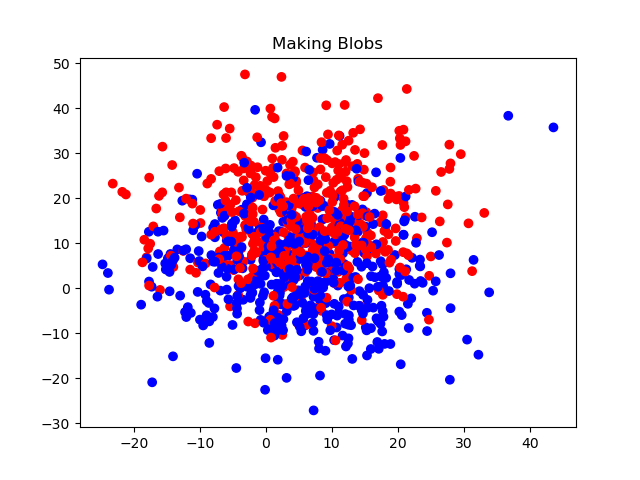

(346, 2) (354, 2)


<IPython.core.display.Javascript object>


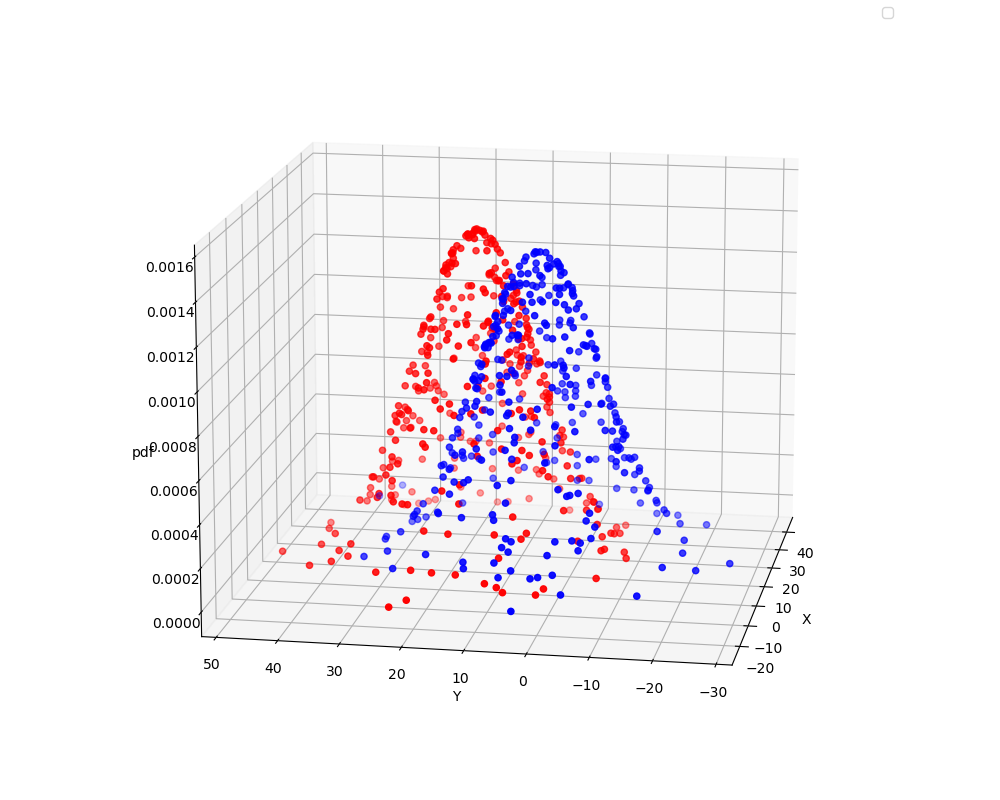

No handles with labels found to put in legend.


Prior probability for y=0: 0.4942857142857143
Prior probability for y=1: 0.5057142857142857

-----Likelihood predictions-----
# Correct predictions:208
Total data size: 300
Accuracy: 0.6933333333333334

-----Posterior predictions-----
# Correct predictions:209
Total data size: 300
Accuracy: 0.6966666666666667


In [5]:
n_samples = [500, 500]
centers = np.array([[5, 5], [5, 15]])

X, y = make_blobs(n_samples=n_samples,centers=centers, cluster_std=10, random_state=100)
cols = ['b','r','g','m','c']
col= [cols[int(i)] for i in y]
plt.figure()
plt.scatter(X[:, 0], X[:, 1], color=col)
plt.title('Making Blobs')
plt.show()

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109) # 70% training and 30% test

# sort data into classes
Xy0 = X[y == 0]
Xy1 = X[y == 1]
#print(Xy0.shape, Xy1.shape)
Xy0 = x_train[y_train == 0]
Xy1 = x_train[y_train == 1]
print(Xy0.shape, Xy1.shape)

mu_Xy0 = np.mean(Xy0,axis=0)
sigma_Xy0 = np.cov(Xy0.T)

mu_Xy1 = np.mean(Xy1,axis=0)
sigma_Xy1 = np.cov(Xy1.T)

pdf_Xy0 = liklihood_distribution(Xy0,mu_Xy0,sigma_Xy0)
pdf_Xy1 = liklihood_distribution(Xy1,mu_Xy1,sigma_Xy1)

fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('pdf')
ax.set_title("Likelihood")
ax.legend()

ax.scatter(Xy0[:,0], Xy0[:,1], pdf_Xy0, color='b')
ax.scatter(Xy1[:,0], Xy1[:,1], pdf_Xy1, color='r')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('pdf')
ax.set_title("Likelihood")
plt.show()

prior_Xy0 = prior_probability(len(Xy0),len(x_train))
print("Prior probability for y=0: " + str(prior_Xy0))
prior_Xy1 = prior_probability(len(Xy1),len(x_train))
print("Prior probability for y=1: " + str(prior_Xy1))

liklihoodClassifier(x_test,y_test,mu_Xy0,sigma_Xy0,mu_Xy1,sigma_Xy1)

posteriorClassifier(x_test,y_test,prior_Xy0, prior_Xy1, mu_Xy0,sigma_Xy0,mu_Xy1,sigma_Xy1)

## Class with unequal prior and overlapping PDF (1)

<IPython.core.display.Javascript object>


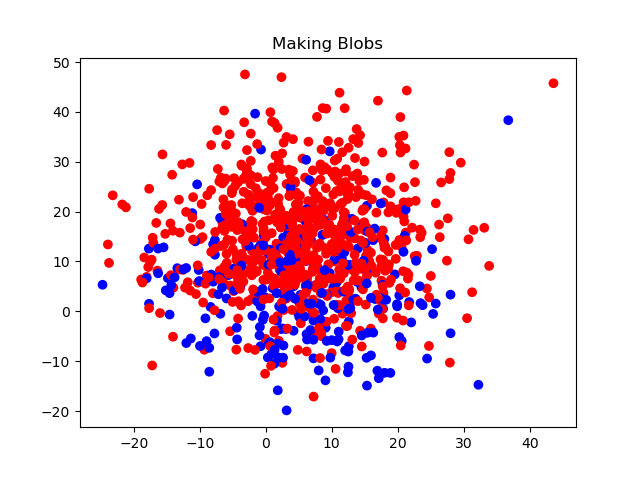

(180, 2) (520, 2)


<IPython.core.display.Javascript object>


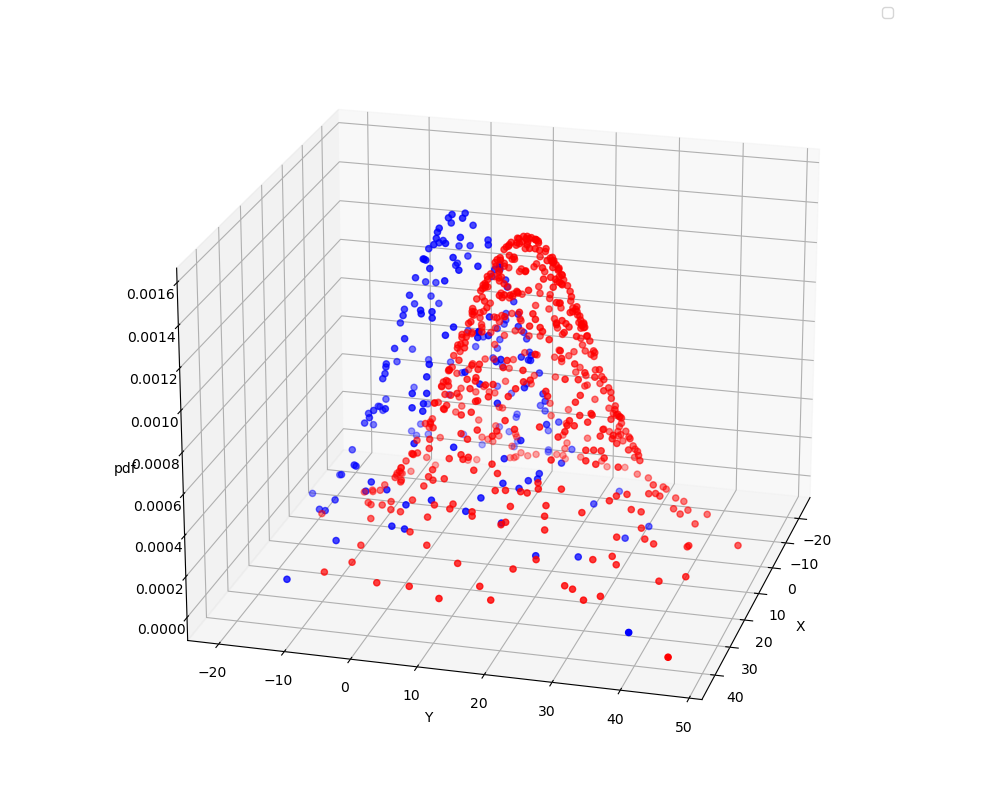

No handles with labels found to put in legend.


Prior probability for y=0: 0.2571428571428571
Prior probability for y=1: 0.7428571428571429

-----Likelihood predictions-----
# Correct predictions:204
Total data size: 300
Accuracy: 0.68

-----Posterior predictions-----
# Correct predictions:244
Total data size: 300
Accuracy: 0.8133333333333334


In [6]:
n_samples = [250, 750]
centers = np.array([[5, 5], [5, 15]])

X, y = make_blobs(n_samples=n_samples,centers=centers, cluster_std=10, random_state=100)
cols = ['b','r','g','m','c']
col= [cols[int(i)] for i in y]
plt.figure()
plt.scatter(X[:, 0], X[:, 1], color=col)
plt.title('Making Blobs')
plt.show()

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109) # 70% training and 30% test

# sort data into classes
Xy0 = X[y == 0]
Xy1 = X[y == 1]
#print(Xy0.shape, Xy1.shape)
Xy0 = x_train[y_train == 0]
Xy1 = x_train[y_train == 1]
print(Xy0.shape, Xy1.shape)

mu_Xy0 = np.mean(Xy0,axis=0)
sigma_Xy0 = np.cov(Xy0.T)

mu_Xy1 = np.mean(Xy1,axis=0)
sigma_Xy1 = np.cov(Xy1.T)

pdf_Xy0 = liklihood_distribution(Xy0,mu_Xy0,sigma_Xy0)
pdf_Xy1 = liklihood_distribution(Xy1,mu_Xy1,sigma_Xy1)

fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('pdf')
ax.set_title("Likelihood")
ax.legend()

ax.scatter(Xy0[:,0], Xy0[:,1], pdf_Xy0, color='b')
ax.scatter(Xy1[:,0], Xy1[:,1], pdf_Xy1, color='r')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('pdf')
ax.set_title("Likelihood")
plt.show()

prior_Xy0 = prior_probability(len(Xy0),len(x_train))
print("Prior probability for y=0: " + str(prior_Xy0))
prior_Xy1 = prior_probability(len(Xy1),len(x_train))
print("Prior probability for y=1: " + str(prior_Xy1))

liklihoodClassifier(x_test,y_test,mu_Xy0,sigma_Xy0,mu_Xy1,sigma_Xy1)

posteriorClassifier(x_test,y_test,prior_Xy0, prior_Xy1, mu_Xy0,sigma_Xy0,mu_Xy1,sigma_Xy1)

## Class with unequal prior and overlapping PDF (2)

<IPython.core.display.Javascript object>


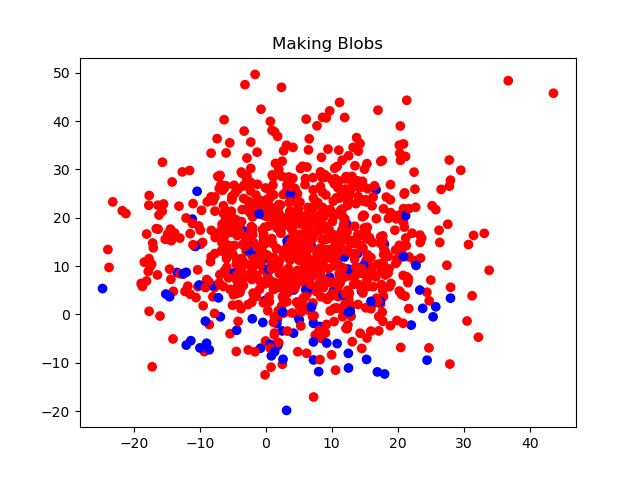

(76, 2) (624, 2)


<IPython.core.display.Javascript object>


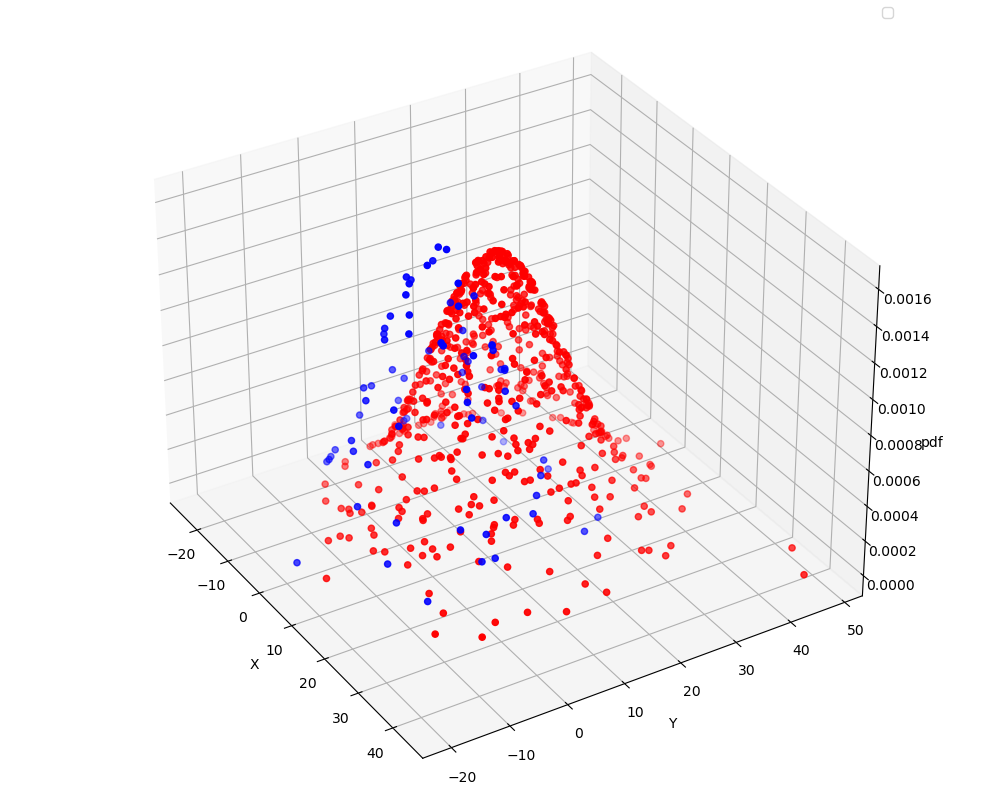

No handles with labels found to put in legend.


Prior probability for y=0: 0.10857142857142857
Prior probability for y=1: 0.8914285714285715

-----Likelihood predictions-----
# Correct predictions:209
Total data size: 300
Accuracy: 0.6966666666666667

-----Posterior predictions-----
# Correct predictions:276
Total data size: 300
Accuracy: 0.92


In [7]:
n_samples = [100, 900]
centers = np.array([[5, 5], [5, 15]])

X, y = make_blobs(n_samples=n_samples,centers=centers, cluster_std=10, random_state=100)
cols = ['b','r','g','m','c']
col= [cols[int(i)] for i in y]
plt.figure()
plt.scatter(X[:, 0], X[:, 1], color=col)
plt.title('Making Blobs')
plt.show()

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109) # 70% training and 30% test

# sort data into classes
Xy0 = X[y == 0]
Xy1 = X[y == 1]
#print(Xy0.shape, Xy1.shape)
Xy0 = x_train[y_train == 0]
Xy1 = x_train[y_train == 1]
print(Xy0.shape, Xy1.shape)

mu_Xy0 = np.mean(Xy0,axis=0)
sigma_Xy0 = np.cov(Xy0.T)

mu_Xy1 = np.mean(Xy1,axis=0)
sigma_Xy1 = np.cov(Xy1.T)

pdf_Xy0 = liklihood_distribution(Xy0,mu_Xy0,sigma_Xy0)
pdf_Xy1 = liklihood_distribution(Xy1,mu_Xy1,sigma_Xy1)

fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('pdf')
ax.set_title("Likelihood")
ax.legend()

ax.scatter(Xy0[:,0], Xy0[:,1], pdf_Xy0, color='b')
ax.scatter(Xy1[:,0], Xy1[:,1], pdf_Xy1, color='r')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('pdf')
ax.set_title("Likelihood")
plt.show()

prior_Xy0 = prior_probability(len(Xy0),len(x_train))
print("Prior probability for y=0: " + str(prior_Xy0))
prior_Xy1 = prior_probability(len(Xy1),len(x_train))
print("Prior probability for y=1: " + str(prior_Xy1))

liklihoodClassifier(x_test,y_test,mu_Xy0,sigma_Xy0,mu_Xy1,sigma_Xy1)

posteriorClassifier(x_test,y_test,prior_Xy0, prior_Xy1, mu_Xy0,sigma_Xy0,mu_Xy1,sigma_Xy1)